## Portfolio Exercise: Starbucks
<br>

<img src="https://opj.ca/wp-content/uploads/2018/02/New-Starbucks-Logo-1200x969.jpg" width="200" height="200">
<br>
<br>
 
#### Background Information

The dataset you will be provided in this portfolio exercise was originally used as a take-home assignment provided by Starbucks for their job candidates. The data for this exercise consists of about 120,000 data points split in a 2:1 ratio among training and test files. In the experiment simulated by the data, an advertising promotion was tested to see if it would bring more customers to purchase a specific product priced at $10. Since it costs the company 0.15 to send out each promotion, it would be best to limit that promotion only to those that are most receptive to the promotion. Each data point includes one column indicating whether or not an individual was sent a promotion for the product, and one column indicating whether or not that individual eventually purchased that product. Each individual also has seven additional features associated with them, which are provided abstractly as V1-V7.

#### Optimization Strategy

Your task is to use the training data to understand what patterns in V1-V7 to indicate that a promotion should be provided to a user. Specifically, your goal is to maximize the following metrics:

* **Incremental Response Rate (IRR)** 

IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (_treatment_) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (_control_).

$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$


* **Net Incremental Revenue (NIR)**

NIR depicts how much is made (or lost) by sending out the promotion. Mathematically, this is 10 times the total number of purchasers that received the promotion minus 0.15 times the number of promotions sent out, minus 10 times the number of purchasers who were not given the promotion.

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

For a full description of what Starbucks provides to candidates see the [instructions available here](https://drive.google.com/open?id=18klca9Sef1Rs6q8DW4l7o349r8B70qXM).

Below you can find the training data provided.  Explore the data and different optimization strategies.

#### How To Test Your Strategy?

When you feel like you have an optimization strategy, complete the `promotion_strategy` function to pass to the `test_results` function.  
From past data, we know there are four possible outomes:

Table of actual promotion vs. predicted promotion customers:  

<table>
<tr><th></th><th colspan = '2'>Actual</th></tr>
<tr><th>Predicted</th><th>Yes</th><th>No</th></tr>
<tr><th>Yes</th><td>I</td><td>II</td></tr>
<tr><th>No</th><td>III</td><td>IV</td></tr>
</table>

The metrics are only being compared for the individuals we predict should obtain the promotion – that is, quadrants I and II.  Since the first set of individuals that receive the promotion (in the training set) receive it randomly, we can expect that quadrants I and II will have approximately equivalent participants.  

Comparing quadrant I to II then gives an idea of how well your promotion strategy will work in the future. 

Get started by reading in the data below.  See how each variable or combination of variables along with a promotion influences the chance of purchasing.  When you feel like you have a strategy for who should receive a promotion, test your strategy against the test dataset used in the final `test_results` function.

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

In [18]:
# load in packages
from itertools import combinations

from test_results import test_results, score
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
from sklearn.metrics import precision_score, recall_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors,datasets
from imblearn.over_sampling import SMOTE
from sklearn.sklearn.decomposition import PCA
from sklearn.sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn.linear_model import LogisticRegression

# load in the data
train_data = pd.read_csv('/Users/tewodros/Downloads/Starbucks-promotion-experiment/code/training.csv')
train_data.head()

ModuleNotFoundError: No module named 'imblearn'

In [2]:
# check the shape
train_data.shape

(84534, 10)

In [3]:
# check any missing and data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84534 entries, 0 to 84533
Data columns (total 10 columns):
ID           84534 non-null int64
Promotion    84534 non-null object
purchase     84534 non-null int64
V1           84534 non-null int64
V2           84534 non-null float64
V3           84534 non-null float64
V4           84534 non-null int64
V5           84534 non-null int64
V6           84534 non-null int64
V7           84534 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 6.4+ MB


Note :- Fortunately, data integrity is perfect. All non-null, and no mixed types.

Distribuition of Not purchase(0) and Purchase(1): 
0    83494
1     1040
Name: purchase, dtype: int64

Not purchase 98.77 % of the dataset
Purchase 1.23 % of the dataset


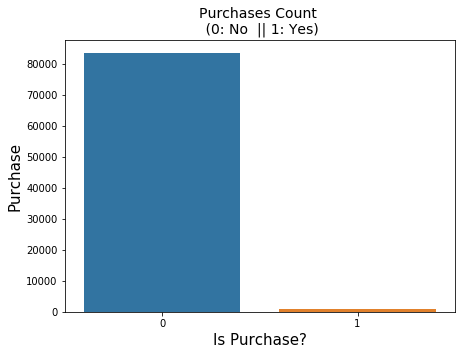

In [4]:
#Lets start looking the difference by Normal and Fraud transactions
print("Distribuition of Not purchase(0) and Purchase(1): ")
print(train_data["purchase"].value_counts())
print('')

# The classes are heavily skewed we need to solve this issue later.
print('Not purchase', round(train_data['purchase'].value_counts()[0]/len(train_data) * 100,2), '% of the dataset')
print('Purchase', round(train_data['purchase'].value_counts()[1]/len(train_data) * 100,2), '% of the dataset')

plt.figure(figsize=(7,5))
sns.countplot(train_data['purchase'])
plt.title('Purchases Count \n (0: No  || 1: Yes)', fontsize=14)
plt.xlabel("Is Purchase?", fontsize=15)
plt.ylabel("Purchase", fontsize=15)
plt.show()

To see the count of unique values for each purchase types. The target datasets are imbalanced. Apply SMOTE technques 

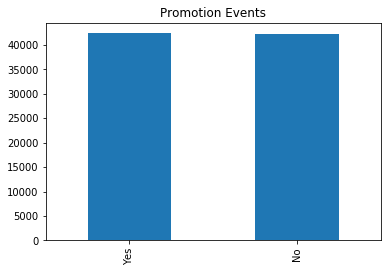

In [5]:
s = train_data['Promotion'].value_counts().plot(kind = 'bar')
plt.title('Promotion Events')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2330e940>,
      dtype=object)

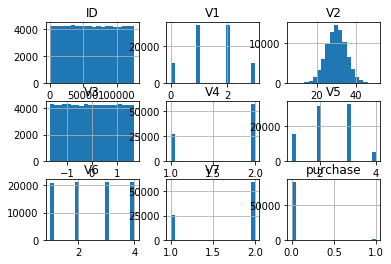

In [6]:
# Histogram distributin 
train_data.hist(bins = 20)

In [7]:
# Summary Statistics
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,84534.0,62970.972413,36418.440539,1.000000,31467.250000,62827.500000,94438.750000,126184.000000
purchase,84534.0,0.012303,0.110234,0.000000,0.000000,0.000000,0.000000,1.000000
V1,84534.0,1.500662,0.868234,0.000000,1.000000,2.000000,2.000000,3.000000
V2,84534.0,29.973600,5.010626,7.104007,26.591501,29.979744,33.344593,50.375913
V3,84534.0,0.000190,1.000485,-1.684550,-0.905350,-0.039572,0.826206,1.691984
V4,84534.0,1.679608,0.466630,1.000000,1.000000,2.000000,2.000000,2.000000
V5,84534.0,2.327643,0.841167,1.000000,2.000000,2.000000,3.000000,4.000000
V6,84534.0,2.502898,1.117349,1.000000,2.000000,3.000000,4.000000,4.000000
V7,84534.0,1.701694,0.457517,1.000000,1.000000,2.000000,2.000000,2.000000


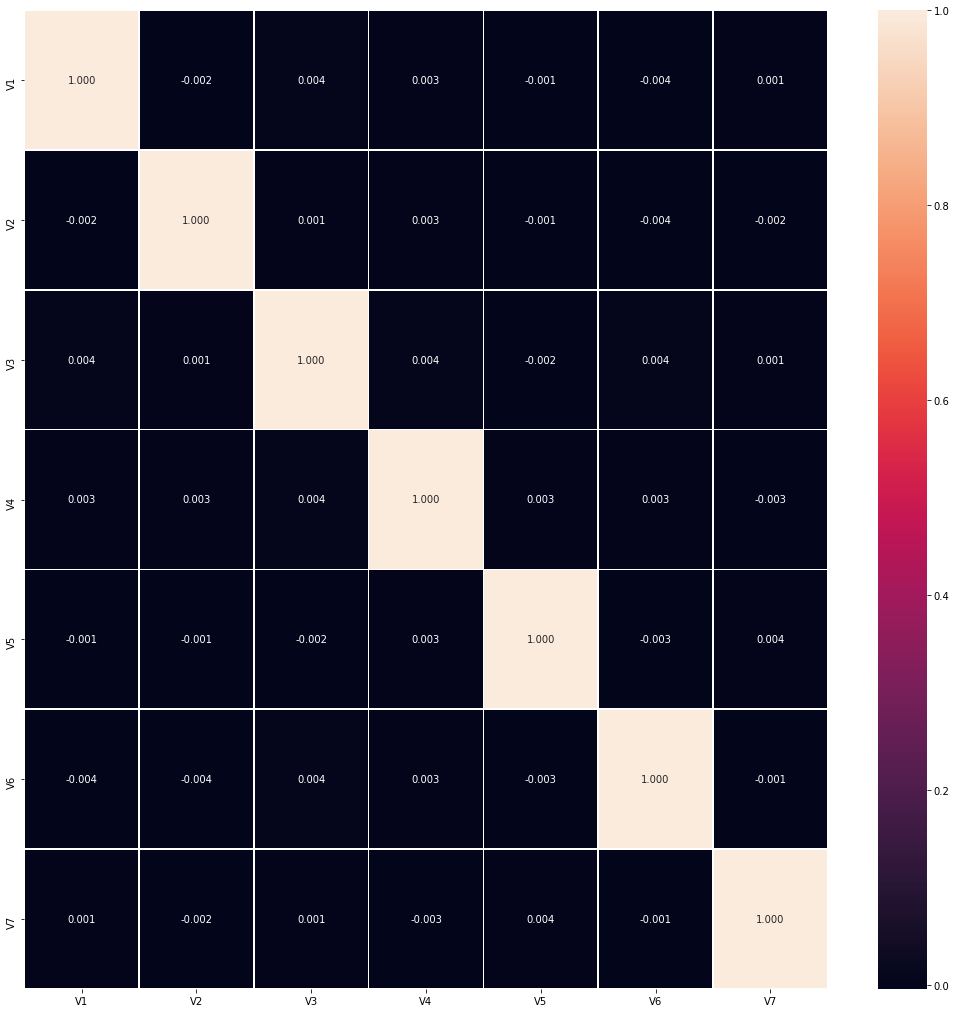

In [8]:
# check Correlation 
df = train_data.drop(['ID', 'Promotion', 'purchase'] , axis = 1)
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)

In [9]:
# Split dataset in experimenta group and control group
promotion_group = train_data[train_data['Promotion']== 'Yes']
n_promotion = promotion_group.shape[0]
print(promotion_group.shape)
print(n_promotion)

control_group = train_data[train_data['Promotion'] == 'No']
n_control = control_group.shape[0]
print(control_group.shape)
print(n_control)


(42364, 10)
42364
(42170, 10)
42170


In [10]:
# Calculate the probability for purchase in experiment and control group

p_promotion = list(promotion_group.groupby('purchase').size())[1] /n_promotion

purchasers_promotion = promotion_group.groupby('purchase').size()[1]
print(p_promotion)
print(purchasers_promotion)

p_control = list(control_group.groupby('purchase').size())[1] / n_control
purchaser_control = control_group.groupby('purchase').size()[1]
print(p_control)
print(purchaser_control)      

0.017019167217448776
721
0.007564619397676073
319


In [11]:
#Compute IRR
IRR = p_promotion - p_control
IRR

0.009454547819772702

In [12]:
# Compute NIR
NIR = (10 * purchasers_promotion - 0.15 * n_promotion) - 10 * purchaser_control
print(NIR)

-2334.5999999999995


In [13]:
# Base line prediction of purchase using default setting on the data without modification
y = train_data['purchase']
X = train_data.iloc[:,3:]

In [15]:
# split into train / test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Class balance in test group
print("TEST GROUP")
print('Size:',y_test.count())
print("Purchase percentage:",
      y_test.value_counts()[1]/y_test.count())
print("Not Purchase percentage:",
      y_test.value_counts()[0]/y_test.count())

# Class balance in train group
print("\nTRAIN GROUP")
print('Size:',y_train.count())
print("Purchase percentage:",
      y_train.value_counts()[1]/y_train.count())
print("Not Purchase percentage:",
      y_train.value_counts()[0]/y_train.count())

TEST GROUP
Size: 16907
Purchase percentage: 0.012302596557638847
Not Purchase percentage: 0.9876974034423611

TRAIN GROUP
Size: 67627
Purchase percentage: 0.012302778476052463
Not Purchase percentage: 0.9876972215239476


## Baseline Algorithms

let start without any modification for feature variables

TRAIN GROUP

Cross-validation accuracy scores: [0.98766801 0.98771183 0.98771183]
Mean score: 0.9876972219558714

TEST GROUP

Accuracy score: 0.9876974034423611

Classification report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     16699
           1       0.00      0.00      0.00       208

   micro avg       0.99      0.99      0.99     16907
   macro avg       0.49      0.50      0.50     16907
weighted avg       0.98      0.99      0.98     16907



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


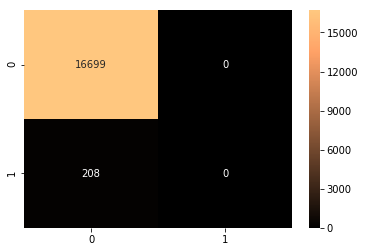

In [16]:
# Invoke Classifier
clf = LogisticRegression()

# Cross-validate on the train data
train_cv = cross_val_score(X=X_train,y=y_train,estimator=clf,cv=3)
print("TRAIN GROUP")
print("\nCross-validation accuracy scores:",train_cv)
print("Mean score:",train_cv.mean())

# Now predict on the test group
print("\nTEST GROUP")
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("\nAccuracy score:",clf.score(X_test,y_test))

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()

The confusion matrix and classification reports reveal that the high scores are merely a reflection of the class imbalance. Since we're using a generalized scoring method, accuracy reflects the recall of both purchase and not purchase. However, since purchase are so few,(0.0012%) their poor recall (0.00%) isn't reflected in the overall accuracy score.

In [ ]:
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    
    
    
    
    return promotion

In [ ]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)